<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Hands%20on%20Activity%201.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [4]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [5]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [6]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [7]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [8]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [9]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [10]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start): # explores a child of the node
        if node not in path: # avoid cycles
            if shortest == None or len(path) < len(shortest): # if none currently shortest path OR shorter path found
                newPath = DFS(graph, node, end, path, shortest, # recur with start being current node
                              toPrint)
                if newPath != None: # if newPath has been found
                    shortest = newPath # shortest path is new path
        elif toPrint:
            print('Already visited', node)
    return shortest
# when used, toPrint should be True in order for the recursion to print final path

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [11]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [12]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [13]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Current DFS path: Boston->New York->Chicago->Denver
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

From what I understand, the first step is to create a graph and in the sample code it is a directed graph which stores the vertices and edges in an object. The next step is to create a function which makes use of recursion to explore a single node until its end before exploring other nodes.

More details are found on the comments of the ```DFS()``` method.

10. Create a method to define BFS technique

In [74]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath] # stores possible paths
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))

        lastNode = tmpPath[-1] # last node is last element on temp path list
        if lastNode == end: # if last node the one that we're looking
            return tmpPath # return the temp path

        for nextNode in graph.childrenOf(lastNode): # iterates over children of last node
            if nextNode not in tmpPath: # avoid cycles
                newPath = tmpPath + [nextNode] # appends next node to new path
                pathQueue.append(newPath)
    return None
# when used, toPrint should be True in order for the recursion to print final path

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [75]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [76]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    
The BFS method somewhat uses the bottom-up approach to the algorithm as the path is being built with the use of a queue. More details are commented on the ```BFS()``` method

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph

  <font color = "darkblue"> Sampaloc, Manila to Cubao, Quezon City </font>
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

Graph Visualization
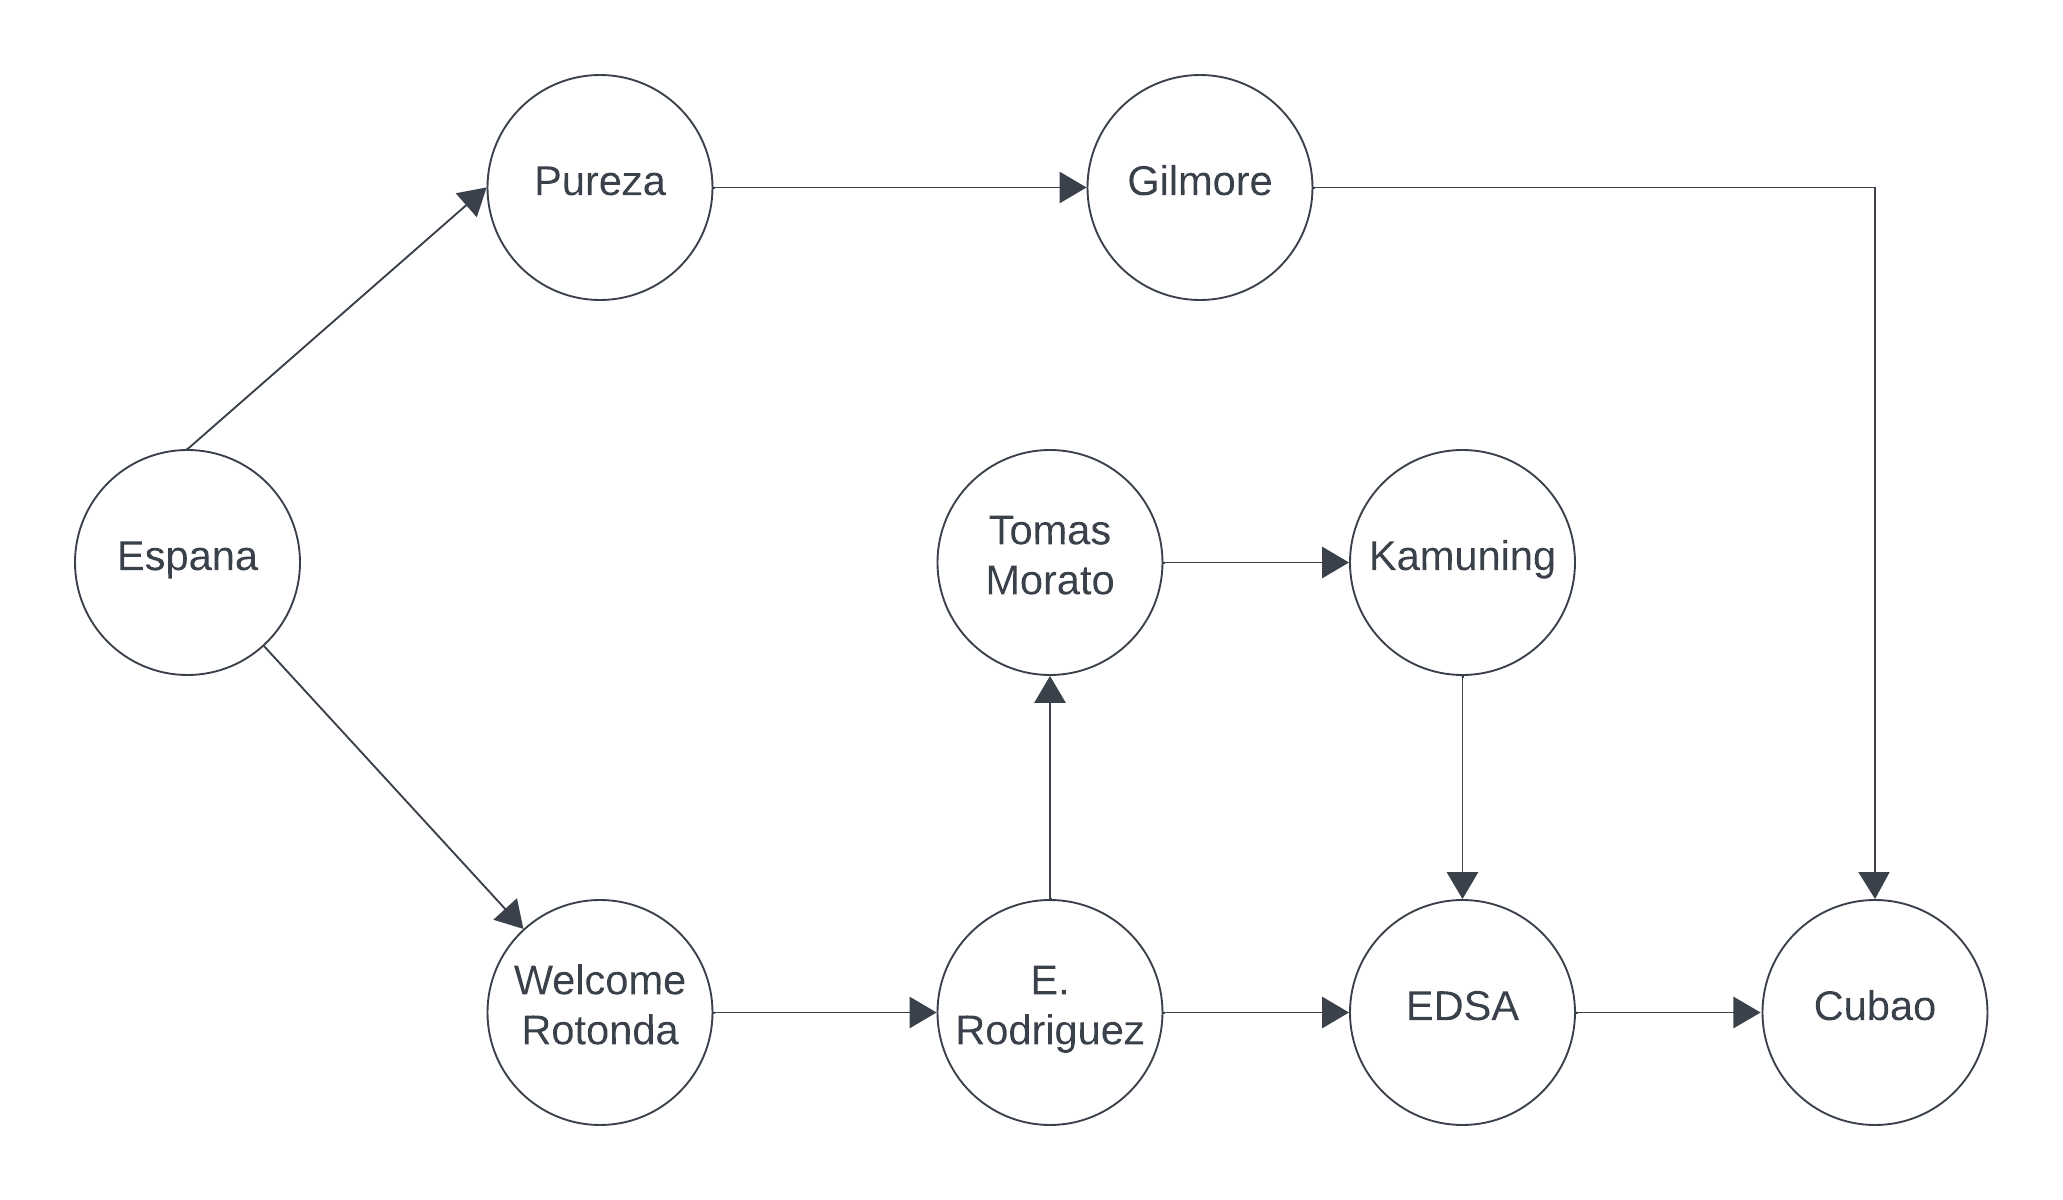

In [62]:
def createSuppGraph(): # makes a directed graph
  g = Digraph()
  for name in ("Espana", "Welcome Rotonda", "E. Rodriguez", "EDSA", "Cubao", "Tomas Morato", "Kamuning", "Pureza", "Gilmore"):
    g.addNode(Node(name))
  g.addEdge(Edge(g.getNode("Espana"), g.getNode("Welcome Rotonda")))
  g.addEdge(Edge(g.getNode("Espana"), g.getNode("Pureza")))
  g.addEdge(Edge(g.getNode("Pureza"), g.getNode("Gilmore")))
  g.addEdge(Edge(g.getNode("Gilmore"), g.getNode("Cubao")))
  g.addEdge(Edge(g.getNode("Welcome Rotonda"), g.getNode("E. Rodriguez")))
  g.addEdge(Edge(g.getNode("E. Rodriguez"), g.getNode("Tomas Morato")))
  g.addEdge(Edge(g.getNode("E. Rodriguez"), g.getNode("EDSA")))
  g.addEdge(Edge(g.getNode("Tomas Morato"), g.getNode("Kamuning")))
  g.addEdge(Edge(g.getNode("Kamuning"), g.getNode("EDSA")))
  g.addEdge(Edge(g.getNode("EDSA"), g.getNode("Cubao")))
  return g
suppGraph = createSuppGraph()

In [73]:
# type your code here using DFS
def suppDFS(graph, source, destination, current_path=[], all_paths=[]):

  current_path.append(source) # add current node to the path

  if source == destination: # when destination is reached,
      all_paths.append(current_path[:]) # append a copy of the current path to all_paths

  for child in graph.childrenOf(source): # finds all paths
      if child not in current_path: # prevent cycles
          suppDFS(graph, child, destination, current_path[:], all_paths)

  return min(all_paths, key=len) # gets the shortest path on all_paths

resultA = suppDFS(suppGraph, suppGraph.getNode("Espana"), suppGraph.getNode("Cubao"))
printPath(resultA)

'Espana->Pureza->Gilmore->Cubao'

In [121]:
# type your code here using BFS
def suppBFS(graph, source, destination):
  queue = [(source, [source])] # initialize the queue with the source node and its path
  while queue:
      current_node, path = queue.pop(0) # remove the first element
      for child in graph.childrenOf(current_node): # explores every adjacent node
          if child not in path: # prevent cycles
              if child == destination: # if the child is the destination, return the path
                  return path + [child]
              else: # else add the child node with its updated path
                  queue.append((child, path + [child]))
  return None # if destination not found, return None
resultB = suppBFS(suppGraph, suppGraph.getNode("Espana"), suppGraph.getNode("Cubao"))
printPath(resultB)

'Espana->Pureza->Gilmore->Cubao'

#Type your evaluation about the performance of DFS and BFS

DFS is more space consuming as it considers every path before choosing the shortest path, however for graphs with long distances between nodes this would be better.

For graphs with short distances BFS is better since the result would already be the shortest path but it would be going per level, so the farther the distance the more vertices it would travel.

#### Conclusion

#Type your conclusion here

I conclude that there are two primary ways of finding the shortest path possible in a graph, the depth-first search and the breadth first search, each of them has their use cases and knowing when to use them is crucial for solving the shortest path problem efficiently.